# Erlang distribution
$$\large
f(x; k,\lambda)={\lambda^k x^{k-1} e^{-\lambda x} \over (k-1)!}$$

$$Y_k = X_1 + X_2 + \cdots + X_k \sim \text{Erlang}(k, \lambda)$$

where $X_i \sim \text{Exponential}(\lambda) $ are i.i.d.

$$
Y_k \sim \text{Normal}(k/\lambda, k/\lambda^2) \quad k \rightarrow \infty 
$$

https://en.wikipedia.org/wiki/Erlang_distribution

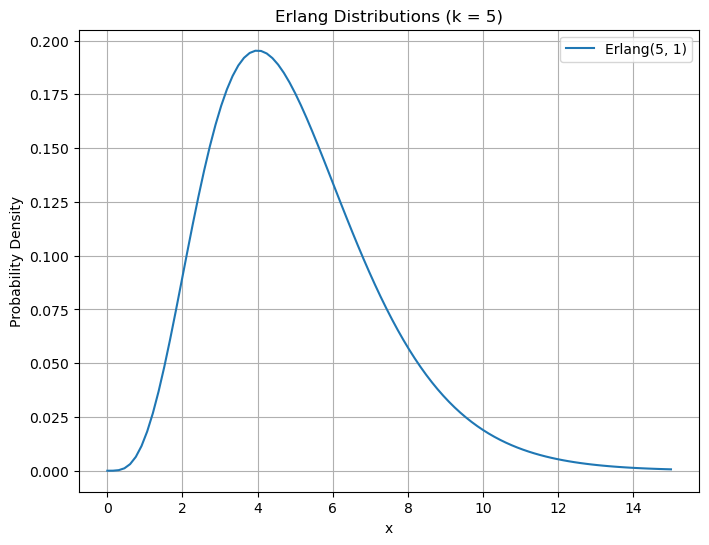

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(0, 15, 100) 
lam = 1
k = 5
erlang_pdf = (lam ** k * x ** (k - 1) * np.exp(-lam * x)) / math.factorial(k - 1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, erlang_pdf, label=f'Erlang({k}, {lam})')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title(f'Erlang Distributions (k = {k})')
ax.legend()
ax.grid(True)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm
import math
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

def plot_distributions(k):
    lam = 1   # arrival rate

    xmax = 3 * k / lam
    x = np.linspace(0, xmax, 200)  # Range of x values
    
    fig, ax = plt.subplots(figsize=(8, 5))

    erlang_pdf = (lam ** k * x ** (k - 1) * np.exp(-lam * x)) / math.factorial(k - 1)

    mu_normal = k / lam
    sigma_normal = np.sqrt(k) / lam
    normal_pdf = norm.pdf(x, loc=mu_normal, scale=sigma_normal)

    ymax = max(erlang_pdf.max(), normal_pdf.max())

    ax.plot(x, erlang_pdf, label=f'Erlang({k}, {lam})')
    ax.plot(x, normal_pdf, label=f'Normal({mu_normal:.2f}, {sigma_normal:.2f})')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.set_xlim([0, xmax])
    ax.set_ylim([0, ymax + 0.0025])
    ax.set_title(f'Erlang and Normal Distributions (k = {k})')
    ax.legend()
    ax.grid(True)
    plt.show()

# Create an interactive widget
interact_widget = widgets.interact(plot_distributions, k=widgets.IntSlider(min=1, max=100, step=1, value=1))

# Display the widget
display(interact_widget)


interactive(children=(IntSlider(value=1, description='k', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_distributions(k)>